In [2]:
from pymssql import *
import pandas as pd 

import matplotlib.pyplot as pl
class CONECT_BD:
    def __init__(self):
       # print('Fabrica de conexao!')
        self.host = ''
        self.user = ''
        self.password = ''
        self.database = ''

    def MTCCON(self):
        self.host = 'BRSAOWSSQLV021.votorantim.grupo:65421'
        self.database  = 'servidor'
        self.user = 'user'
        self.password  = 'senha'
        self.con_rel = connect(self.host, self.user, self.password, self.database)
        self.cur_rel = self.con_rel.cursor()
        #print("Conectando ao Banco.....")
        return self.cur_rel, self.con_rel


In [3]:
bd = CONECT_BD()

In [4]:
cur, con = bd.MTCCON()

In [14]:
lista = []
#cur.execute('select * from tbl where data = convert(date, getdate(), 103)')
dataset = pd.read_sql_query('select * from tbl_Mailing_inteligente_dia where data = convert(date, getdate(), 103)', con)



In [17]:
dataset.head()

,data,record_id,DISCAR,ULTIMA_INTERAÇÃO,Cto_Efetivo_REAL,Sem_Planejado,Sem_Trabalhadas,Sem_Status,Data_Ultima_Visita,record_type,...,P_Compra_ativo_3M,P_Limite_credito,P_Data_Proxima_Compra,P_Bonus,Score,Agrupamento_status,Vendedor,Coordenador,Piloto,Mes_ultima_compra
0,2017-12-14,10866,SIM,,0,1,0,Pendente,None,2,...,0.0,1.0,0.0,0.0,28.0,S,DANIEL JULIO ALVES CAVALHEIRO,MARCOS HENRIQUE BENDER,...,Compra_6M ...
1,2017-12-14,10872,SIM,,1,1,1,Conculido,2017-10-09,2,...,0.0,1.0,0.0,0.0,28.0,S,BERENICE APARECIDA MOREIRA GOMES,JOSE RODRIGO LIMA SALES,...,Compra_6M ...
2,2017-12-14,10873,SIM,,0,1,0,Pendente,None,2,...,0.0,1.0,0.0,0.0,28.0,S,MARCELO AUGUSTO BARROS MOREIRA FILHO,RAFAEL SANTOS SCHER SOARES,...,Compra_6M ...
3,2017-12-14,10879,SIM,,1,1,1,Conculido,2017-10-06,2,...,0.0,1.0,0.0,0.0,28.0,S,ISMAEL OLIVEIRA DE PAIVA,ALEX ALMEIDA DE SOUZA,...,Compra_6M ...
4,2017-12-14,10880,SIM,,0,1,0,Pendente,None,2,...,0.0,1.0,0.0,0.0,28.0,S,WEMERSON LUIZ ROSSOW,ALEX DOS REIS MARTINS,...,Compra_6M ...


In [19]:
dataset.columns

Index(['data', 'record_id', 'DISCAR', 'ULTIMA_INTERAÇÃO', 'Cto_Efetivo_REAL',
       'Sem_Planejado', 'Sem_Trabalhadas', 'Sem_Status', 'Data_Ultima_Visita',
       'record_type', 'record_status', 'call_result', 'Call_Result_1',
       'Call_Result_2', 'Tentativas_1', 'Tentativas_2', 'Phone_1', 'Phone_2',
       'Codigo', 'Micro Região', 'Meso Região', 'Segmento', 'Estado',
       'telefone', 'Telefone SMS', 'REGIONAL', 'POSITIVADO',
       'Data_Proxima_Compra', 'TITULOS_EM_ABERTO', 'BLOQUEADO', 'COLANTES',
       'Pedido_em_tela', 'P_Perfil', 'Visita_VE', 'Atraso_VCMais', 'Fraude',
       'Black_list', 'Bonus', 'Compra_ativo_3M', 'Limite_credito',
       'Restrição_de_contato', 'Vol_Cap_Ativo_M', 'MargemMedia3MR$',
       'CimentosMesAtual', 'CimentosMedia3M', 'P_Tamanho_Perfil',
       'P_PEDIDO_EM_TELA', 'P_POS_VENDAS', 'P_Compra_ativo_3M',
       'P_Limite_credito', 'P_Data_Proxima_Compra', 'P_Bonus', 'Score',
       'Agrupamento_status', 'Vendedor', 'Coordenador', 'Piloto',
      

In [22]:
dataset.groupby('Micro Região')['BLOQUEADO'].value_counts()

Micro Região         BLOQUEADO
VC-A PARNAIBA PIAUI  NAO            2
VC-ADAMANTINA        NAO           34
VC-AFONSO CLAUDIO    NAO           36
VC-AGLOM URB S LUIS  NAO          322
                     SIM           24
VC-AGRESTE ITABAIAN  NAO           16
VC-AGRESTE LAGARTO   NAO           20
                     SIM            1
VC-AGRESTE POTIGUAR  SIM            1
VC-AL MEARIM GRAJAU  NAO           30
VC-ALAGOA S S FRANC  NAO           21
                     SIM            2
VC-ALAGOINHAS        NAO           60
                     SIM            3
VC-ALEGRE            NAO           30
VC-ALFENAS           NAO           68
                     SIM            1
VC-ALTA FLORESTA     NAO            8
VC-ALTAMIRA          NAO           33
                     SIM            5
VC-ALTO ARAGUAIA     NAO           10
VC-ALTO CAPIBARIBE   NAO           25
VC-ALTO GUAPORE      NAO            9
VC-ALTO PANTANAL     NAO           29
                     SIM            3
VC-ALTO PARAGUAI   

In [32]:
dataset.groupby('BLOQUEADO')['Codigo'].value_counts()

BLOQUEADO  Codigo   
NAO        1000004.0    1
           1000008.0    1
           1000013.0    1
           1000016.0    1
           1000018.0    1
           1000033.0    1
           1000044.0    1
           1000059.0    1
           1000067.0    1
           1000074.0    1
           1000090.0    1
           1000097.0    1
           1000098.0    1
           1000105.0    1
           1000106.0    1
           1000114.0    1
           1000120.0    1
           1000129.0    1
           1000131.0    1
           1000145.0    1
           1000149.0    1
           1000150.0    1
           1000162.0    1
           1000171.0    1
           1000174.0    1
           1000181.0    1
           1000185.0    1
           1000204.0    1
           1000215.0    1
           1000222.0    1
                       ..
SIM        1434646.0    1
           1434686.0    1
           1434870.0    1
           1434901.0    1
           1434915.0    1
           1435010.0    1
           143511

In [34]:
dataset['BLOQUEADO'].value_counts()

NAO    24271
SIM     1211
Name: BLOQUEADO, dtype: int64

In [37]:
dataset.columns

Index(['data', 'record_id', 'DISCAR', 'ULTIMA_INTERAÇÃO', 'Cto_Efetivo_REAL',
       'Sem_Planejado', 'Sem_Trabalhadas', 'Sem_Status', 'Data_Ultima_Visita',
       'record_type', 'record_status', 'call_result', 'Call_Result_1',
       'Call_Result_2', 'Tentativas_1', 'Tentativas_2', 'Phone_1', 'Phone_2',
       'Codigo', 'Micro Região', 'Meso Região', 'Segmento', 'Estado',
       'telefone', 'Telefone SMS', 'REGIONAL', 'POSITIVADO',
       'Data_Proxima_Compra', 'TITULOS_EM_ABERTO', 'BLOQUEADO', 'COLANTES',
       'Pedido_em_tela', 'P_Perfil', 'Visita_VE', 'Atraso_VCMais', 'Fraude',
       'Black_list', 'Bonus', 'Compra_ativo_3M', 'Limite_credito',
       'Restrição_de_contato', 'Vol_Cap_Ativo_M', 'MargemMedia3MR$',
       'CimentosMesAtual', 'CimentosMedia3M', 'P_Tamanho_Perfil',
       'P_PEDIDO_EM_TELA', 'P_POS_VENDAS', 'P_Compra_ativo_3M',
       'P_Limite_credito', 'P_Data_Proxima_Compra', 'P_Bonus', 'Score',
       'Agrupamento_status', 'Vendedor', 'Coordenador', 'Piloto',
      

In [39]:
dataset.describe()

,record_id,Cto_Efetivo_REAL,Sem_Trabalhadas,Codigo,telefone,Vol_Cap_Ativo_M,P_Tamanho_Perfil,P_PEDIDO_EM_TELA,P_POS_VENDAS,P_Compra_ativo_3M,P_Limite_credito,P_Data_Proxima_Compra,P_Bonus,Score
count,25482.000000,25482.000000,25482.000000,2.548200e+04,2.548200e+04,16762.000000,25482.000000,25482.000000,25482.0,25482.000000,25482.000000,25482.000000,25482.0,25482.000000
mean,12741.500000,0.348050,0.335609,1.238039e+06,1.396871e+10,1076.282821,14.613563,7.136018,10.0,4.113453,1.773958,3.133035,0.0,22.109254
std,7356.164116,0.555048,0.517724,1.561888e+05,2.367740e+10,11455.550351,8.967043,4.520866,0.0,8.294005,0.831515,3.870875,0.0,23.522711
min,1.000000,0.000000,0.000000,1.000004e+06,4.227811e+08,0.050000,1.500000,0.000000,10.0,0.000000,1.000000,0.000000,0.0,0.000000
25%,6371.250000,0.000000,0.000000,1.064710e+06,3.237225e+09,15.000000,7.300000,0.000000,10.0,0.000000,1.000000,2.000000,0.0,0.000000
50%,12741.500000,0.000000,0.000000,1.255898e+06,6.233349e+09,60.000000,16.000000,10.000000,10.0,0.000000,2.000000,2.000000,0.0,24.000000
75%,19111.750000,1.000000,1.000000,1.393290e+06,8.835717e+09,254.100000,21.900000,10.000000,10.0,0.000000,3.000000,2.000000,0.0,42.000000
max,25482.000000,9.000000,4.000000,3.224759e+06,9.999996e+10,916147.248000,35.000000,10.000000,10.0,25.000000,3.000000,15.000000,0.0,91.000000


In [47]:
dataset['Pedido_em_tela'].value_counts()

NAO    18184
SIM     7298
Name: Pedido_em_tela, dtype: int64

In [49]:
dataset['BLOQUEADO'].value_counts()

NAO    24271
SIM     1211
Name: BLOQUEADO, dtype: int64

In [5]:
dataset = pd.read_sql_query('''select 
                            data, 
                            Codigo, 
                            Pedido_em_tela, 
                            BLOQUEADO,
                            Score,
                            TITULOS_EM_ABERTO,
                            REGIONAL,
                            [Micro Região],
                            [Meso Região], 
                            Estado, 
                            Fraude, 
                            Black_list, 
                            Vendedor, 
                            Coordenador, 
                            Mes_ultima_compra, 
                            P_Perfil  
                            from tbl_Mailing_inteligente_dia 
                            where data >= '2017-12-01' ''', con)

In [6]:
dataset['data'].value_counts()

2017-12-06    25489
2017-12-04    25489
2017-12-07    25489
2017-12-05    25489
2017-12-01    25489
2017-12-08    25482
2017-12-09    25482
2017-12-15    25482
2017-12-14    25482
2017-12-13    25482
2017-12-10    25482
2017-12-12    25482
2017-12-11    25482
Name: data, dtype: int64

In [7]:
dataset.columns

Index(['data', 'Codigo', 'Pedido_em_tela', 'BLOQUEADO', 'Score',
       'TITULOS_EM_ABERTO', 'REGIONAL', 'Micro Região', 'Meso Região',
       'Estado', 'Fraude', 'Black_list', 'Vendedor', 'Coordenador',
       'Mes_ultima_compra', 'P_Perfil'],
      dtype='object')

In [65]:
dataset.groupby('data')['Pedido_em_tela'].value_counts()

data        Pedido_em_tela
2017-12-01  NAO               14490
            SIM               10999
2017-12-04  NAO               14632
            SIM               10857
2017-12-05  NAO               14603
            SIM               10886
2017-12-06  NAO               14565
            SIM               10924
2017-12-07  NAO               14637
            SIM               10852
2017-12-08  NAO               17152
            SIM                8330
2017-12-09  NAO               16329
            SIM                9153
2017-12-10  NAO               17528
            SIM                7954
2017-12-11  NAO               18962
            SIM                6520
2017-12-12  NAO               18646
            SIM                6836
2017-12-13  NAO               18515
            SIM                6967
2017-12-14  NAO               18184
            SIM                7298
Name: Pedido_em_tela, dtype: int64

In [71]:
pedido = dataset[dataset['Pedido_em_tela'] == 'SIM']

In [74]:
pedido['data'].value_counts()

2017-12-01    10999
2017-12-06    10924
2017-12-05    10886
2017-12-04    10857
2017-12-07    10852
2017-12-09     9153
2017-12-08     8330
2017-12-10     7954
2017-12-14     7298
2017-12-13     6967
2017-12-12     6836
2017-12-11     6520
Name: data, dtype: int64

In [75]:
bloqueado = dataset[dataset['BLOQUEADO'] == 'SIM']

In [77]:
bloqueado['data'].value_counts()

2017-12-14    1211
2017-12-13    1071
2017-12-01    1056
2017-12-04    1054
2017-12-06    1053
2017-12-05    1053
2017-12-09    1050
2017-12-10    1050
2017-12-11    1050
2017-12-12    1047
2017-12-08     655
2017-12-07     655
Name: data, dtype: int64

In [89]:
lista = bloqueado['REGIONAL'].value_counts()

In [119]:

float(sum(lista)/25000)

0.4802

In [8]:
sum(lista)

NameError: name 'lista' is not defined

In [10]:
dataset[dataset['BLOQUEADO']=='SIM'].count()

data                 13216
Codigo               13216
Pedido_em_tela       13216
BLOQUEADO            13216
Score                13216
TITULOS_EM_ABERTO    13216
REGIONAL             13216
Micro Região         13216
Meso Região          13216
Estado               13216
Fraude               13216
Black_list           13216
Vendedor             13216
Coordenador          12709
Mes_ultima_compra    13216
P_Perfil             13216
dtype: int64

In [15]:
dataset.loc[(dataset['BLOQUEADO']=='SIM') & (dataset['Pedido_em_tela']=='SIM')]

,data,Codigo,Pedido_em_tela,BLOQUEADO,Score,TITULOS_EM_ABERTO,REGIONAL,Micro Região,Meso Região,Estado,Fraude,Black_list,Vendedor,Coordenador,Mes_ultima_compra,P_Perfil
18550,2017-12-09,1061961.0,SIM,SIM,0.0,SIM,SU,VC-CHAPECO,VC-SC-OESTE CATARINE,SC,NAO,NAO,DANIEL JULIO ALVES CAVALHEIRO,None,Compra_6M ...,Fortaleza VC PP
22606,2017-12-15,1333610.0,SIM,SIM,0.0,NAO,NE,VC-SERT QUIXERAMOBI,VC-CE-SERTOES CEAREN,CE,NAO,NAO,FRANCISCO NEILSON LIMA VIEIRA,LUCIANO COSTA LAGOA,Compra_6M ...,Fortaleza VC PP
29530,2017-12-14,1282254.0,SIM,SIM,0.0,SIM,SU,VC-XANXERE,VC-SC-OESTE CATARINE,SC,NAO,NAO,DEBORA CRISTINA BERGERSCH,MARCOS HENRIQUE BENDER,Compra_6M ...,MultiMarca PP
41910,2017-12-01,1061961.0,SIM,SIM,0.0,NAO,SU,VC-CHAPECO,VC-SC-OESTE CATARINE,SC,NAO,NAO,DANIEL JULIO ALVES CAVALHEIRO,None,Compra_6M ...,Fortaleza VC PP
67683,2017-12-15,1006006.0,SIM,SIM,0.0,SIM,SU,VC-CURITIBA,VC-PR-METROP DE CURI,PR,NAO,NAO,SERGIO RENATO MOLINETTI,PAULO ANTONIO FAZIO FILHO,Compra_6M ...,MultiMarca G
82009,2017-12-10,1061961.0,SIM,SIM,0.0,SIM,SU,VC-CHAPECO,VC-SC-OESTE CATARINE,SC,NAO,NAO,DANIEL JULIO ALVES CAVALHEIRO,None,Compra_6M ...,Fortaleza VC PP
100917,2017-12-15,1376210.0,SIM,SIM,0.0,SIM,NE,VC-CATU,VC-BA-METROP SALVADO,BA,NAO,NAO,REGINALDO BARBOSA DE OLIVEIRA JUNIOR,RAFAEL SANTOS SCHER SOARES,Compra_6M ...,Sem Pesquisa M
102667,2017-12-15,1057682.0,SIM,SIM,0.0,SIM,SU,VC-CURITIBA,VC-PR-METROP DE CURI,PR,NAO,NAO,DIOGO MANOEL MORINI SILVA,PAULO ANTONIO FAZIO FILHO,Compra_6M ...,Fortaleza VC G
104124,2017-12-11,1061961.0,SIM,SIM,0.0,NAO,SU,VC-CHAPECO,VC-SC-OESTE CATARINE,SC,NAO,NAO,DANIEL JULIO ALVES CAVALHEIRO,None,Compra_6M ...,Fortaleza VC PP
109041,2017-12-01,1209916.0,SIM,SIM,0.0,NAO,SE,VC-S JOSE CAMPOS,VC-SP-VALE PARAI PAU,SP,NAO,NAO,JOAO DA SILVA KREVER,ELIAS PEREIRA DE SOUZA NETO,Maior_6M ...,Fortaleza Concorrente G


In [29]:
#dataset.groupby('data')['Pedido_em_tela'].value_counts()
dataset.groupby('Codigo')['BLOQUEADO'].count()

Codigo
27343.0       5
27353.0       5
27433.0       5
27438.0       5
27453.0       5
27455.0       5
27464.0       5
1000004.0    13
1000008.0    13
1000013.0    13
1000016.0    13
1000018.0    13
1000033.0    13
1000044.0    13
1000059.0    13
1000067.0    13
1000074.0    13
1000090.0    13
1000097.0    13
1000098.0    13
1000105.0    13
1000106.0    13
1000114.0    13
1000120.0    13
1000129.0    13
1000131.0    13
1000145.0    13
1000149.0    13
1000150.0    13
1000162.0    13
             ..
1459398.0    13
1459402.0    13
1459418.0    13
1459426.0    13
1459537.0    13
1459547.0    13
1459559.0    13
1459587.0    13
1459604.0    13
1459609.0    13
1459630.0    13
1459645.0    13
1459648.0    13
1459657.0    13
1459704.0    13
1459711.0    13
1459717.0    13
1459723.0    13
1459726.0    13
1459744.0    13
1459753.0    13
1459778.0    13
1459800.0    13
1459894.0    13
1460049.0    13
1460107.0    13
1460181.0    13
3186021.0    13
3209925.0    13
3224759.0    13
Name: BLOQUEADO, 

In [31]:
dataset.loc[dataset['BLOQUEADO']=='SIM']

,data,Codigo,Pedido_em_tela,BLOQUEADO,Score,TITULOS_EM_ABERTO,REGIONAL,Micro Região,Meso Região,Estado,Fraude,Black_list,Vendedor,Coordenador,Mes_ultima_compra,P_Perfil
109,2017-12-01,1078587.0,NAO,SIM,0.0,SIM,SU,VC-CRICIUMA,VC-SC-SUL CATARINENS,SC,NAO,NAO,JEFFERSON MACHADO GARCIA,MARCOS HENRIQUE BENDER,Maior_6M ...,Fortaleza VC PP
114,2017-12-01,1071845.0,NAO,SIM,0.0,SIM,NE,VC-SALVADOR,VC-BA-METROP SALVADO,BA,NAO,NAO,REYNALDO SABURO HOSHINO,REYNALDO SABURO HOSHINO,Maior_6M ...,Sem Pesquisa Sem info
117,2017-12-01,1435479.0,NAO,SIM,0.0,NAO,NE,VC-ROSARIO,VC-MA-NORTE MARANHEN,MA,NAO,NAO,ROGERIO ALVES OLIVEIRA,LUCAS CORIOLANO HARB,Maior_6M ...,Sem Pesquisa Sem info
118,2017-12-01,1435432.0,NAO,SIM,0.0,SIM,NE,VC-SALVADOR,VC-BA-METROP SALVADO,BA,NAO,NAO,MARCELO AUGUSTO BARROS MOREIRA FILHO,RAFAEL SANTOS SCHER SOARES,Compra_6M ...,Sem Pesquisa Sem info
125,2017-12-01,1435656.0,NAO,SIM,0.0,SIM,NE,VC-SALVADOR,VC-BA-METROP SALVADO,BA,NAO,NAO,REYNALDO SABURO HOSHINO,REYNALDO SABURO HOSHINO,Maior_6M ...,Sem Pesquisa Sem info
129,2017-12-01,1127653.0,NAO,SIM,0.0,SIM,SE,VC-GUARULHOS,VC-SP-METROPOLITA DE,SP,NAO,NAO,MARCOS COSTA DE SOUZA,ELIAS PEREIRA DE SOUSA NETO,Maior_6M ...,Fortaleza Concorrente PP
227,2017-12-04,1385270.0,NAO,SIM,0.0,SIM,CN,VC-BRASILIA,VC-DF-DISTRITO FEDER,DF,NAO,NAO,SANDRA SILVA MUNIZ,FRANCISCO WILKER ALVES DE AGUIAR,Maior_6M ...,Sem Pesquisa P
249,2017-12-04,1061031.0,NAO,SIM,0.0,SIM,SE,VC-JABOTICABAL,VC-SP-RIBEIRAO PRETO,SP,NAO,NAO,MATHEUS GUEDES DOS SANTOS,LUCIANO VIEIRA,Maior_6M ...,Fortaleza Concorrente P
263,2017-12-04,1313515.0,NAO,SIM,0.0,SIM,CN,VC-BRASILIA,VC-DF-DISTRITO FEDER,DF,NAO,NAO,MARENILSON CARDOSO MENDES,FRANCISCO WILKER ALVES DE AGUIAR,Compra_6M ...,Fortaleza VC G
274,2017-12-04,1052846.0,NAO,SIM,0.0,SIM,SU,VC-LITORAL LAGUNAR,VC-RS-SUDESTE RIO-GR,RS,NAO,NAO,MAURO GILBERTO SAUCEDO RODRIGUES,KELVIN KLANN VIEIRA,Compra_6M ...,Fortaleza VC GG


In [34]:
dataset[dataset['BLOQUEADO']=='SIM'].count()

data                 13216
Codigo               13216
Pedido_em_tela       13216
BLOQUEADO            13216
Score                13216
TITULOS_EM_ABERTO    13216
REGIONAL             13216
Micro Região         13216
Meso Região          13216
Estado               13216
Fraude               13216
Black_list           13216
Vendedor             13216
Coordenador          12709
Mes_ultima_compra    13216
P_Perfil             13216
dtype: int64

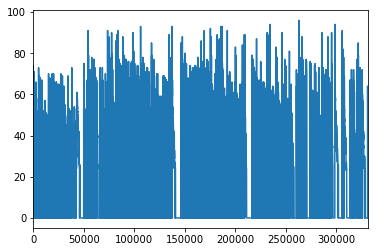

In [37]:
%matplotlib inline
dataset['Score'].plot()

In [43]:
dataset.groupby('data')['BLOQUEADO'].value_counts()

data        BLOQUEADO
2017-12-01  NAO          24433
            SIM           1056
2017-12-04  NAO          24435
            SIM           1054
2017-12-05  NAO          24436
            SIM           1053
2017-12-06  NAO          24436
            SIM           1053
2017-12-07  NAO          24834
            SIM            655
2017-12-08  NAO          24827
            SIM            655
2017-12-09  NAO          24432
            SIM           1050
2017-12-10  NAO          24432
            SIM           1050
2017-12-11  NAO          24432
            SIM           1050
2017-12-12  NAO          24435
            SIM           1047
2017-12-13  NAO          24411
            SIM           1071
2017-12-14  NAO          24271
            SIM           1211
2017-12-15  NAO          24271
            SIM           1211
Name: BLOQUEADO, dtype: int64

In [48]:
dataset.columns

Index(['data', 'Codigo', 'Pedido_em_tela', 'BLOQUEADO', 'Score',
       'TITULOS_EM_ABERTO', 'REGIONAL', 'Micro Região', 'Meso Região',
       'Estado', 'Fraude', 'Black_list', 'Vendedor', 'Coordenador',
       'Mes_ultima_compra', 'P_Perfil'],
      dtype='object')

In [50]:
dataset.describe()

,Codigo,Score
count,3.313010e+05,331301.000000
mean,1.237911e+06,19.099553
std,1.566726e+05,22.979838
min,2.734300e+04,0.000000
25%,1.064706e+06,0.000000
50%,1.255857e+06,0.000000
75%,1.393289e+06,41.000000
max,3.224759e+06,96.000000


In [52]:
dataset['Score'].value_counts()

0.0     182165
26.0     10425
41.0      9384
24.0      7108
32.0      6320
39.0      6191
43.0      6007
30.0      5651
45.0      5064
51.0      4980
42.0      4249
52.0      4043
25.0      4035
46.0      3956
31.0      3663
49.0      3287
44.0      3246
47.0      3207
33.0      2932
50.0      2917
34.0      2792
29.0      2786
48.0      2561
40.0      2487
54.0      2473
53.0      2219
23.0      2203
66.0      2019
27.0      1958
28.0      1863
         ...  
63.0       879
71.0       851
69.0       713
65.0       705
73.0       704
36.0       687
72.0       614
77.0       602
61.0       551
76.0       496
74.0       471
75.0       466
78.0       267
79.0       217
80.0       132
81.0       114
82.0        69
84.0        65
83.0        57
85.0        53
86.0        38
87.0        33
88.0        25
89.0        21
90.0        11
91.0         7
93.0         4
94.0         2
92.0         2
96.0         1
Name: Score, Length: 74, dtype: int64

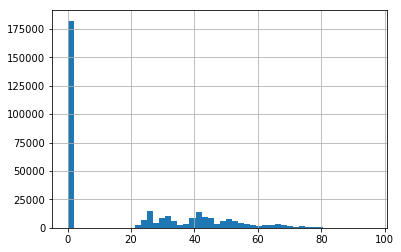

In [63]:
dataset['Score'].hist(bins=50)

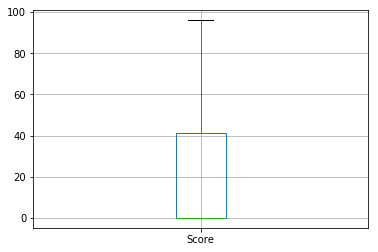

In [64]:
dataset.boxplot(column='Score')

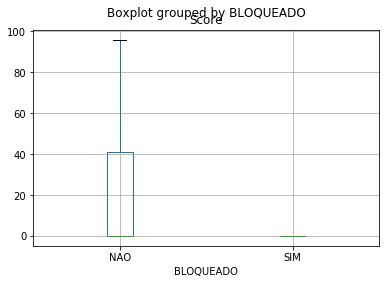

In [65]:
dataset.boxplot(column='Score', by='BLOQUEADO')

TypeError: must be str, not float

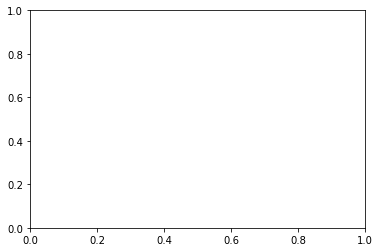